# Review of classical electronic structure methods 

In order to assess the performance of quantum computing algorithms in addressing the electronic structure problem, we will briefly review a few commonly employed classical electronic structure methods of varying level of approximation. 

## Hartree-Fock

The Hartree-Fock (HF) method employs a **mean-field approximation**, where Coulomb correlation of electrons is neglected. The HF wavefunction is hence restricted to the form of a single Slater determinant, for which the optimal form may be acquired by an optimization of the underlying single particle basis (orbitals). Once the optimal HF orbitals have been found, the HF state may be written as 

$$ | \text{HF} \rangle = \prod_{p \in \text{occ}} \hat a^\dagger_p | \text{vac} \rangle $$

where $\hat a^\dagger_p$ creates an electron in the $p^{\rm{th}}$ optimized HF spin orbital, and  $| \text{vac} \rangle$ is the vacuum state (all spin-orbitals unoccupied). Due to the restriction to a single Slater determinant, the HF energy may be obtained very efficiently and can be applied to very large molecules, however it becomes qualitatively incorrect when **electronic correlations** become sufficiently strong. The HF wavefunction is often used as a starting point in more accurate treatments of electronic correlation. 

## Coupled cluster

The Coupled cluster (CC) method introduces electronic correlation to the wavefunction ansatz by operating on the HF reference state with the exponential of excitation operators

$$|\text{CC} \rangle = e^{\hat T} | \text{HF}\rangle, \quad \hat T = \hat T_1 + \hat T_2 + ...$$

where $\hat T_1 = \sum_{ia} t^{a}_i \hat a^\dagger_a \hat a_i$ are referred to as 'singles', $\hat T_2 = \sum_{ijab} t^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j$ as 'doubles', etc. When the excitation rank is truncated to only singles (S) and doubles (D), $\hat T = \hat T_1 + \hat T_2$, the corresponding ansatz is referred to as CCSD. Since the number of possible single and double excitations for a system of $N$ electrons in $M$ orbitals is polynomial in $M$, one can efficiently solve a system of equations to obtain the optimized CCSD amplitudes. CCSD often gives accurate energies and can be applied to modestly sized chemical systems. However, due to its implementation, it can **violate the variational principle** and give energies lower than the ground state.

## Full Configuration Interaction
The full configuration interaction (FCI) method yields the **exact ground state energy** within a given basis set. The FCI wavefunction is written as a linear combination of all possible $N$-particle Slater determinants over the orbital basis
$$|\text{FCI} \rangle =  \left( \sum_{ia} C^{a}_i \hat a^\dagger_a \hat a_i + \sum_{ijab} C^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j + ...  \right) | \text{HF} \rangle $$
where the sum includes up to $N$-electron excitations, and hence there are an exponential number of coefficients to optimize in $| \text{FCI} \rangle$. Due to its **exponential complexity**, FCI is often reserved for only the smallest chemical systems. However, it serves as a useful result to compare to when assessing tractable electronic structure methods.

# Benchmarking for electronic PESs in minimal basis (STO-3G)

We will apply HF, CCSD, and FCI to obtaining the PESs for a few molecular dissociation processes in minimal (STO-3G) basis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utility import get_molecular_data, obtain_PES

basis = 'sto-3g'

## H<sub>2</sub>

In [2]:
bond_lengths = np.linspace(0.2,2.6,15)

In [3]:
#Run FCI
FCI_PES = obtain_PES('h2', bond_lengths, basis, method='fci')

E = 0.15748213365503494 Eh
E = -0.8488991062024307 Eh
E = -1.088228184406917 Eh
E = -1.1369289594005694 Eh
E = -1.122957052798233 Eh
E = -1.0887645364963472 Eh
E = -1.050442037218747 Eh
E = -1.0154681711140932 Eh
E = -0.9873930555210572 Eh
E = -0.9670259116093078 Eh
E = -0.9534242388722525 Eh
E = -0.9449089870950522 Eh
E = -0.9398197912188271 Eh
E = -0.9368706035283363 Eh
E = -0.9351960308386074 Eh


In [4]:
#Run HF
HF_PES = obtain_PES('h2', bond_lengths, basis,  method='hf')

E = 0.16412595411336117 Eh
E = -0.8397057843499895 Eh
E = -1.0748879317191191 Eh
E = -1.1175258568986786 Eh
E = -1.0951595815644826 Eh
E = -1.049561784275208 Eh
E = -0.9960202460350617 Eh
E = -0.9415474099692247 Eh
E = -0.8899751417971353 Eh
E = -0.8432718025417775 Eh
E = -0.8022429584004123 Eh
E = -0.7669825247359986 Eh
E = -0.7371545448988277 Eh
E = -0.7121961606082434 Eh
E = -0.691470051262483 Eh


In [5]:
#Run CCSD
CCSD_PES = obtain_PES('h2', bond_lengths, basis,  method='ccsd')

E = 0.1574841205643646 Eh
E = -0.8488985094851168 Eh
E = -1.088231017430786 Eh
E = -1.1369333351418642 Eh
E = -1.1229593878059771 Eh
E = -1.088760690592053 Eh
E = -1.050426089327125 Eh
E = -1.015441558375805 Eh
E = -0.9873692849076258 Eh
E = -0.9670168314563384 Eh
E = -0.953430155825735 Eh
E = -0.9449225613845055 Eh
E = -0.9398332746700121 Eh
E = -0.9368793989542723 Eh
E = -0.935198926536707 Eh


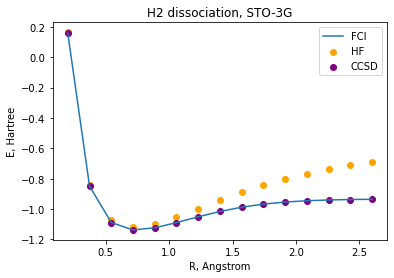

In [7]:
#Plot H2 PESs

plt.title('H2 dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()

<img src="figs/testimage.png">

## H<sub>2</sub>O symmetric O-H dissociation

In [8]:
bond_lengths = np.linspace(0.5,2.7,15)

In [9]:
#Run FCI
FCI_PES = obtain_PES('h2o', bond_lengths, basis, method='fci')

E = -73.14278405998363 Eh
E = -74.47523205267969 Eh
E = -74.90413378058078 Eh
E = -75.0138313395661 Eh
E = -75.00356512166883 Eh
E = -74.95170869126758 Eh
E = -74.89218648216085 Eh
E = -74.83923063661703 Eh
E = -74.7986636593667 Eh
E = -74.77161515186945 Eh
E = -74.75568947214511 Eh
E = -74.74704715250861 Eh
E = -74.74248898749319 Eh
E = -74.74007426523073 Eh
Could not converge


In [10]:
#Run HF
HF_PES = obtain_PES('h2o', bond_lengths, basis,  method='hf')

E = -73.12948161321033 Eh
E = -74.45343797012085 Eh
E = -74.87055361047595 Eh
E = -74.96308510924827 Eh
E = -74.92817508739459 Eh
E = -74.84281942864168 Eh
E = -74.74051950149057 Eh
E = -74.63577758414064 Eh
E = -74.53576638656533 Eh
E = -74.44494384742792 Eh
E = -74.3697550426047 Eh
E = -74.29778481417918 Eh
E = -74.24167220051214 Eh
E = -74.27129957698052 Eh
Could not converge


In [11]:
#Run CCSD
CCSD_PES = obtain_PES('h2o', bond_lengths, basis,  method='ccsd')

E = -73.14276363918698 Eh
E = -74.47519485717142 Eh
E = -74.90406353010556 Eh
E = -75.01370018934797 Eh
E = -75.00330155818912 Eh
E = -74.95116757042634 Eh
E = -74.89128367467829 Eh
E = -74.83853401139106 Eh
E = -74.80070162376008 Eh
E = -74.78105738717342 Eh
E = -74.74394274758097 Eh
E = -74.77972801511771 Eh
E = -74.78338963453061 Eh
E = -74.64224434263171 Eh
Could not converge


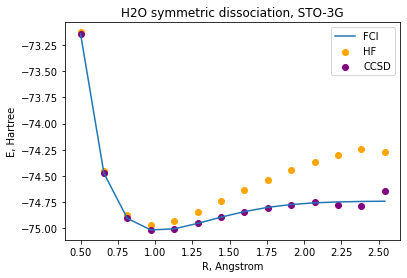

In [12]:
#Plot H2O PESs

plt.title('H2O symmetric dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()

## LiH

In [17]:
bond_lengths = np.linspace(0.5,3.5,31)
print('Running FCI')
FCI_PES = obtain_PES('lih', bond_lengths, basis, method='fci')
print('Running HF')
HF_PES = obtain_PES('lih', bond_lengths, basis,  method='hf')
print('Running CCSD')
CCSD_PES = obtain_PES('lih', bond_lengths, basis,  method='ccsd')

Running FCI
E = -7.050225036066637 Eh
E = -7.319318938170454 Eh
E = -7.505051767361835 Eh
E = -7.634167329728379 Eh
E = -7.723423721347273 Eh
E = -7.784460280267082 Eh
E = -7.825536957974927 Eh
E = -7.8524308533163865 Eh
E = -7.869139976429576 Eh
E = -7.878453652319026 Eh
E = -7.882362286810916 Eh
E = -7.882324378871238 Eh
E = -7.879433516531942 Eh
E = -7.874524024942904 Eh
E = -7.868240793792813 Eh
E = -7.861087772411115 Eh
E = -7.853462904979717 Eh
E = -7.8456836231164875 Eh
E = -7.838005002547126 Eh
E = -7.830631624342899 Eh
E = -7.823723883389371 Eh
E = -7.817399927375675 Eh
E = -7.811735339056934 Eh
E = -7.8067634025037576 Eh
E = -7.802478452788829 Eh
E = -7.798843159455177 Eh
E = -7.7957985332709185 Eh
E = -7.7932743006258836 Eh
E = -7.791197565942271 Eh
E = -7.789498785374276 Eh
E = -7.788115123260274 Eh
Running HF
E = -7.028471753592102 Eh
E = -7.29961044269316 Eh
E = -7.4860204040660925 Eh
E = -7.615847732045232 Eh
E = -7.705830270835124 Eh
E = -7.767438446509458 Eh
E = -7.808

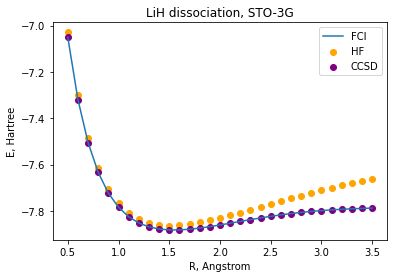

In [18]:
plt.title('LiH dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()

## H<sub>4</sub> angle

In [4]:
angles = np.linspace(85,95,21)
print('Running FCI')
FCI_PES = obtain_PES('h4', angles, basis, method='fci')
print('Running HF')
HF_PES = obtain_PES('h4', angles, basis,  method='hf')
print('Running CCSD')
CCSD_PES = obtain_PES('h4', angles, basis,  method='ccsd')

Running FCI
E = -1.9867261151116669 Eh
E = -1.9837530747912604 Eh
E = -1.9809876600812362 Eh
E = -1.9784558966242 Eh
E = -1.9761849765158965 Eh
E = -1.97420249223009 Eh
E = -1.9725353916283392 Eh
E = -1.9712086838516676 Eh
E = -1.9702439840851032 Eh
E = -1.9696580521829739 Eh
E = -1.9694615253790517 Eh
E = -1.969658052182969 Eh
E = -1.9702439840851014 Eh
E = -1.9712086838516671 Eh
E = -1.9725353916283392 Eh
E = -1.9742024922300896 Eh
E = -1.9761849765158996 Eh
E = -1.9784558966242072 Eh
E = -1.9809876600812322 Eh
E = -1.983753074791248 Eh
E = -1.9867261151116735 Eh
Running HF
E = -1.8473793344555305 Eh
E = -1.8407925357369153 Eh
E = -1.8341616355001356 Eh
E = -1.8274861159746665 Eh
E = -1.8207654212300612 Eh
E = -1.8139989576965778 Eh
E = -1.8071860930044046 Eh
E = -1.8003261569910856 Eh
E = -1.793418440266031 Eh
E = -1.7864621949208466 Eh
E = -1.7794566334077375 Eh
E = -1.7864621949207011 Eh
E = -1.7934184402660238 Eh
E = -1.8003261569911366 Eh
E = -1.8071860930043164 Eh
E = -1.813998

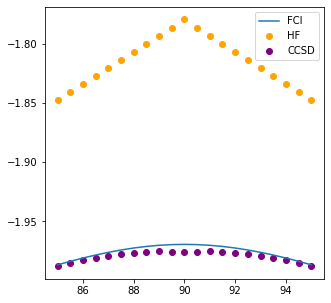

In [10]:
fig = plt.figure(figsize=(5,5))
ax.set_title('H4 angle, STO-3G')
ax.set_xlabel('Angle, Degrees')
ax.set_ylabel('E, Hartree')
ax = fig.add_subplot(1,1,1)
ax.plot(angles, FCI_PES, label='FCI')
ax.scatter(angles, HF_PES, label='HF', color='orange')
ax.scatter(angles, CCSD_PES, label='CCSD', color='purple')
ax.legend()

## N<sub>2</sub>

In [7]:
bond_lengths = np.linspace(0.6,1.8,26)
print('Running FCI')
FCI_PES = obtain_PES('n2', bond_lengths, basis, method='fci')
print('Running HF')
HF_PES = obtain_PES('n2', bond_lengths, basis,  method='hf')
print('Running CCSD')
CCSD_PES = obtain_PES('n2', bond_lengths, basis,  method='ccsd')

Running FCI
E = -103.93173261594437 Eh
E = -104.94737459787737 Eh
E = -105.71074449175751 Eh
E = -106.2822208031208 Eh
E = -106.70717761198145 Eh
E = -107.02005357696656 Eh
E = -107.24719734052454 Eh
E = -107.4088992831745 Eh
E = -107.52085191000079 Eh
E = -107.59521361339424 Eh
E = -107.6414006750823 Eh
E = -107.66669047944974 Eh
E = -107.67668869523908 Eh
E = -107.6756948079022 Eh
E = -107.66699020566313 Eh
E = -107.65306693239377 Eh
E = -107.63581064455737 Eh
E = -107.6166473152899 Eh
E = -107.59665980008009 Eh
E = -107.57667775005528 Eh
E = -107.55734274959379 Eh
E = -107.5391502176973 Eh
E = -107.52247087963558 Eh
E = -107.50755746580218 Eh
E = -107.49454544627453 Eh
E = -107.48345735007983 Eh
Running HF
E = -103.88092057888046 Eh
E = -104.88882594511189 Eh
E = -105.64408755662939 Eh
E = -106.2072017931744 Eh
E = -106.62342000730675 Eh
E = -106.92700924509579 Eh
E = -107.14417363438199 Eh
E = -107.29509907974948 Eh
E = -107.39540800266141 Eh
E = -107.45721515321372 Eh
E = -107.489

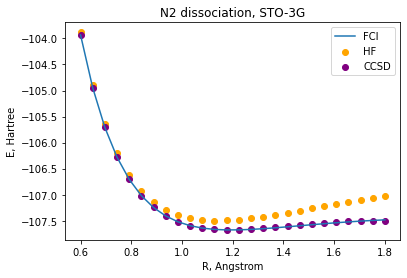

In [8]:
plt.title('N2 dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()

## NH<sub>3</sub>

In [4]:
bond_lengths = np.linspace(0.5,2.0,16)
print('Running FCI')
FCI_PES = obtain_PES('nh3', bond_lengths, basis, method='fci')
print('Running HF')
HF_PES = obtain_PES('nh3', bond_lengths, basis,  method='hf')
print('Running CCSD')
CCSD_PES = obtain_PES('nh3', bond_lengths, basis,  method='ccsd')

Running FCI
E = -52.44294693856378 Eh
E = -54.02186571673829 Eh
E = -54.836917757371914 Eh
E = -55.24927893152996 Eh
E = -55.442954204425575 Eh
E = -55.51550624532096 Eh
E = -55.52037253827211 Eh
E = -55.488500869594404 Eh
E = -55.438919861637686 Eh
E = -55.38352758559788 Eh
E = -55.32940782498629 Eh
E = -55.280389022541 Eh
E = -55.238353570820784 Eh
E = -55.20412358666226 Eh
E = -55.177779108292846 Eh
E = -55.158658572365326 Eh
Running HF
E = -52.4238823524732 Eh
E = -53.997099870426496 Eh
E = -54.805156004873 Eh
E = -55.20908480827171 Eh
E = -55.39249807107991 Eh
E = -55.45240918247021 Eh
E = -55.441550716846024 Eh
E = -55.39003645248074 Eh
E = -55.31601299925026 Eh
E = -55.23063681617511 Eh
E = -55.14063759474523 Eh
E = -55.049985832089575 Eh
E = -54.96108639627829 Eh
E = -54.875540052529 Eh
E = -54.79454629440963 Eh
E = -54.71914671257696 Eh
Running CCSD
E = -52.44291428982965 Eh
E = -54.021825443963856 Eh
E = -54.83686549565489 Eh
E = -55.24920439849324 Eh
E = -55.442836405289064 

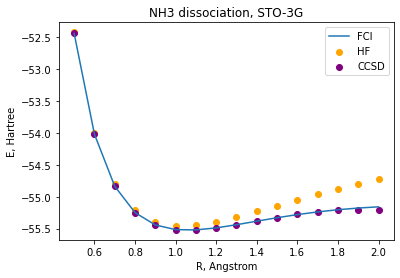

In [5]:
plt.title('NH3 dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()